# Klasifikasi Gambar Bunga
---


## Pendahuluan
Anak-anak biasanya memiliki rasa ingin tahu yang tinggi. Untuk itu pendidikan pada anak dirancang dengan semenarik mungkin dan menyenangkan bagi anak. Salah satu cara yang bisa dilakukan adalah dengan menggunakan teknologi sebagai penunjang pembelajaran. Penggunaan teknologi dalam menyelesaikan tugas pada siswa, juga dapat menimbulkan kreativitas dikalangan siswa dalam mengembangkan pengetahuan yang telah mereka miliki.

Untuk itu dalam proyek ini saya mengangkat judul **Klasifikasi Gambar Bunga** yang diharapkan nantinya dapat diimplementasikan menjadi sebuah aplikasi yang menarik bagi anak-anak untuk belajar mengenali jenis-jenis bunga di sekitar mereka.

## Penyiapan Data



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data Understanding

Untuk memahami dataset berupa gambar, saya mendefinisikan terlebih dahulu direktori datasetnya ke dalam sebuah variabel. Selanjutnya tiap kelas atau label yang tersedia dapat diketahui dengan memanggil `os.listdir`

In [ ]:
import os

In [ ]:
# Mendefinisikan direktori utama dataset
base_dir = '/content/drive/MyDrive/flowers'

In [ ]:
print(os.listdir(base_dir))

['rose', 'tulip', 'sunflower', 'dandelion', 'daisy']


Untuk mengetahui jumlah file yang ada, dapat menggunakan fungsi `len()` pada tiap direktori label dan menjumlahkannya. Untuk memudahkan pembacaan data dapat juga divisualisasikan menggunakan bantuan library `matplotlib`.

In [ ]:
# Menghitung jumlah gambar pada dataset
number_label = {}
total_files = 0
for i in os.listdir(base_dir):
    counting = len(os.listdir(os.path.join(base_dir, i)))
    number_label[i] = counting
    total_files += counting

print("Total Files : " + str(total_files))

Total Files : 4317


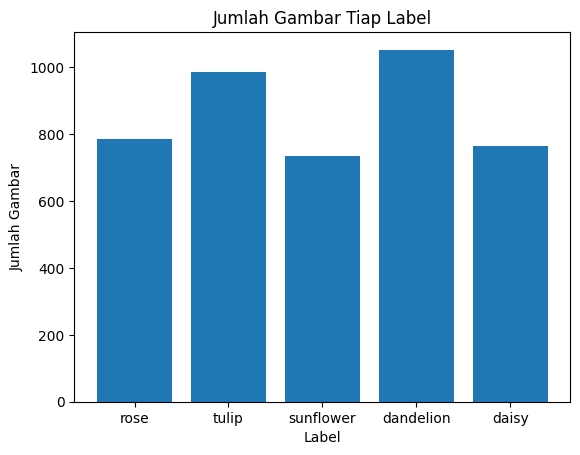

In [ ]:
# Visualisasi jumlah gambar tiap kelas
import matplotlib.pyplot as plt

plt.bar(number_label.keys(), number_label.values());
plt.title("Jumlah Gambar Tiap Label");
plt.xlabel('Label');
plt.ylabel('Jumlah Gambar');

Dari diagram batang di atas dapat diketahui bahwa gambar yang ada pada setiap label memiliki jumlah yang berbeda-beda. Semua label memiliki jumlah lebih dari 700 gambar. Jumlah gambar paling banyak ada pada bunga Dandelion, sedangkan yang paling sedikit adalah bunga matahari (Sunflower). Namun perbedaan jumlah gambar tidak terlalu jauh dan tidak perlu diseimbangkan.

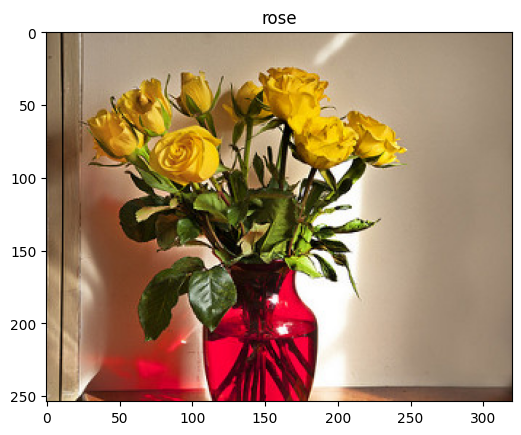

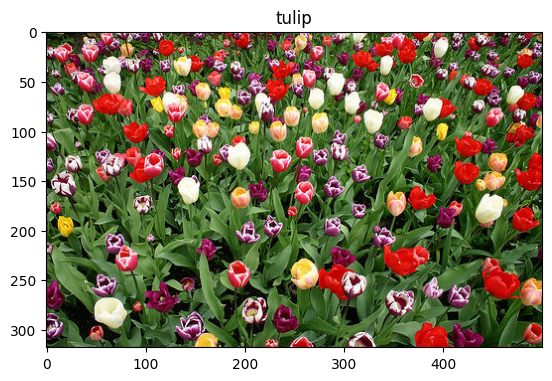

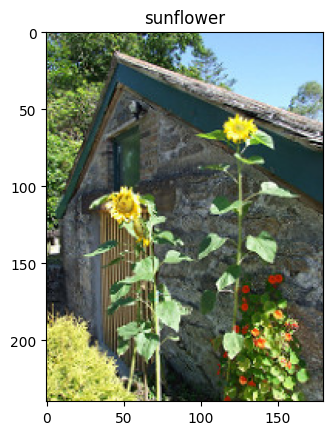

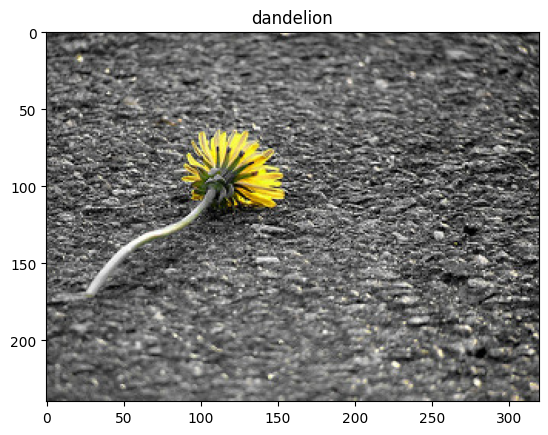

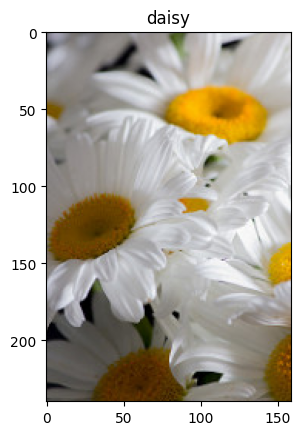

In [ ]:
# Menampilkan sampel gambar tiap kelas
import matplotlib.image as mpimg

img_each_class = 1
img_samples = {}
classes = list(number_label.keys())


for c in classes:
    temp = os.listdir(os.path.join(base_dir, c))[:img_each_class]
    for item in temp:
        img_path = os.path.join(base_dir, c, item)
        img_samples[c] = img_path

for i in img_samples:
    fig = plt.gcf()
    img = mpimg.imread(img_samples[i])
    plt.title(i)
    plt.imshow(img)
    plt.show()

Dari beberapa gambar di atas dapat diketahui bahwa gambar yang tersedia pada dataset ini memiliki ukuran yang berbeda-beda.

## Data Preparation

Setelah memahami data, selanjutnya adalah mempersiapkan data sebelum nantinya masuk ke modelling. Penyiapan ini termasuk didalamnya adalah pembagian data _(split)_ menjadi data latih dan validasi. Pembagian data ini diperlukan sebelum nantinya digunakan untuk melatih model yang dibuat serta menghitung akurasi modelnya.

In [ ]:
IMAGE_SIZE = (200,200)
BATCH_SIZE = 32
SEED = 999

In [ ]:
# Menggunakan ImageDataGenerator untuk preprocessing
import tensorflow as tf

datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    validation_split=0.2
)

In [ ]:
# Menyiapkan data train dan data validation
train_data = datagen.flow_from_directory(
    base_dir,
    class_mode='categorical',
    subset='training',
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    seed=SEED
)

valid_data = datagen.flow_from_directory(
    base_dir,
    class_mode='categorical',
    subset='validation',
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    seed=SEED
)

Found 3457 images belonging to 5 classes.
Found 860 images belonging to 5 classes.


Selain membagi data, akan diterapkan juga image augmentation. Hal ini diterapkan berdasarkan data gambar yang telah ditampilkan sebelumnya. Image augmentation yang dilakukan
 di sini menggunakan layer RandomFlip, RandomRotation, RandomZoom serta Rescaling pada gambar.

In [ ]:
# Image Augmentation
data_augmentation = tf.keras.Sequential(
  [
    tf.keras.layers.RandomFlip("horizontal",
                      input_shape=(IMAGE_SIZE[0],
                                  IMAGE_SIZE[1],
                                  3)),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1),
    tf.keras.layers.Rescaling(1./255)
  ]
)

## Modelling

### Membuat Arsitektur CNN

#### Penyusunan Layer

In [ ]:
# Membuat arsitektur model CNN
cnn_model = tf.keras.models.Sequential([
  data_augmentation,
  tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(5, activation='softmax')
])

# Compiling model
cnn_model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
  )

#### Melatih Model CNN

In [ ]:
# Training model CNN
cnn_hist = cnn_model.fit(
    train_data,
    epochs=20,
    validation_data = valid_data
)

Epoch 1/20
109/109 [==============================] - 1471s 13s/step - loss: 1.3411 - accuracy: 0.3995 - val_loss: 1.1973 - val_accuracy: 0.4663
Epoch 2/20
109/109 [==============================] - 18s 166ms/step - loss: 1.0767 - accuracy: 0.5756 - val_loss: 1.1525 - val_accuracy: 0.5093
Epoch 3/20
109/109 [==============================] - 16s 148ms/step - loss: 1.0133 - accuracy: 0.6043 - val_loss: 1.0491 - val_accuracy: 0.5872
Epoch 4/20
109/109 [==============================] - 16s 143ms/step - loss: 0.9530 - accuracy: 0.6318 - val_loss: 0.9815 - val_accuracy: 0.6140
Epoch 5/20
109/109 [==============================] - 16s 143ms/step - loss: 0.8747 - accuracy: 0.6601 - val_loss: 1.0104 - val_accuracy: 0.6302
Epoch 6/20
109/109 [==============================] - 16s 144ms/step - loss: 0.8645 - accuracy: 0.6642 - val_loss: 0.9083 - val_accuracy: 0.6616
Epoch 7/20
109/109 [==============================] - 16s 149ms/step - loss: 0.8327 - accuracy: 0.6749 - val_loss: 0.9402 - val_ac

#### Evaluasi Model CNN

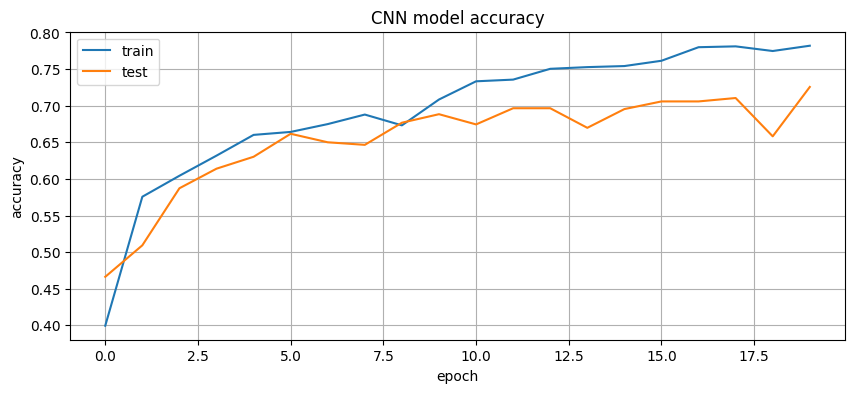

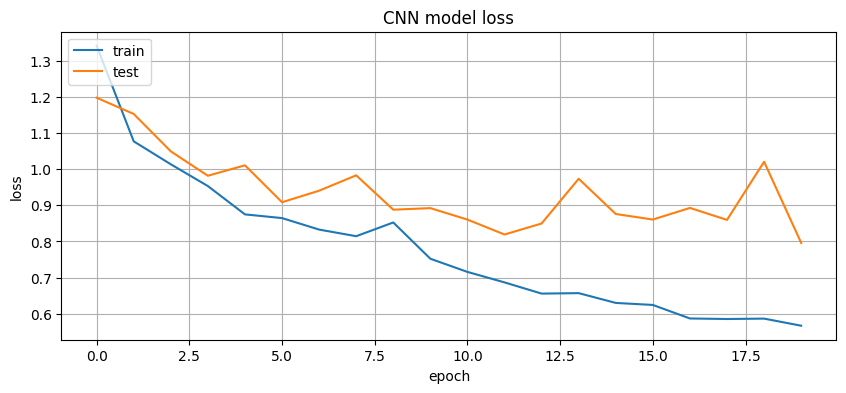

In [ ]:
# Membuat plot akurasi model CNN
plt.figure(figsize=(10,4))
plt.plot(cnn_hist.history['accuracy'])
plt.plot(cnn_hist.history['val_accuracy'])
plt.title('CNN model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid(True)
plt.show()

print()

# Membuat plot loss model CNN
plt.figure(figsize=(10,4))
plt.plot(cnn_hist.history['loss'])
plt.plot(cnn_hist.history['val_loss'])
plt.title('CNN model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid(True)
plt.show()

### Transfer Learning Menggunakan VGG16

#### Memuat Model VGG16

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16

## Loading VGG16 model
base_vgg_model = VGG16(weights="imagenet", include_top=False, input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3))
base_vgg_model.trainable = False

# Preprocessing Input
vgg_preprocess = tf.keras.applications.vgg16.preprocess_input
train_data.preprocessing_function = vgg_preprocess

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
# Transfer learning dengan VGG16
vgg_model = tf.keras.models.Sequential([
  data_augmentation,
  base_vgg_model,
  tf.keras.layers.Dropout(0.7),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(5, activation='softmax')
])

# Compiling model
vgg_model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
  )

#### Melatih Model

In [ ]:
# Melatih model VGG16
vgg_hist = vgg_model.fit(
    train_data,
    epochs=20,
    validation_data = valid_data
)

Epoch 1/20
109/109 [==============================] - 34s 250ms/step - loss: 1.0907 - accuracy: 0.5690 - val_loss: 0.7170 - val_accuracy: 0.7209
Epoch 2/20
109/109 [==============================] - 19s 175ms/step - loss: 0.7645 - accuracy: 0.7203 - val_loss: 0.6858 - val_accuracy: 0.7500
Epoch 3/20
109/109 [==============================] - 19s 174ms/step - loss: 0.7369 - accuracy: 0.7310 - val_loss: 0.5694 - val_accuracy: 0.7965
Epoch 4/20
109/109 [==============================] - 21s 194ms/step - loss: 0.6632 - accuracy: 0.7550 - val_loss: 0.5884 - val_accuracy: 0.7837
Epoch 5/20
109/109 [==============================] - 20s 184ms/step - loss: 0.6487 - accuracy: 0.7579 - val_loss: 0.5802 - val_accuracy: 0.7930
Epoch 6/20
109/109 [==============================] - 20s 181ms/step - loss: 0.6172 - accuracy: 0.7723 - val_loss: 0.5444 - val_accuracy: 0.8174
Epoch 7/20
109/109 [==============================] - 19s 173ms/step - loss: 0.6003 - accuracy: 0.7819 - val_loss: 0.5284 - val_ac

#### Evaluasi Model

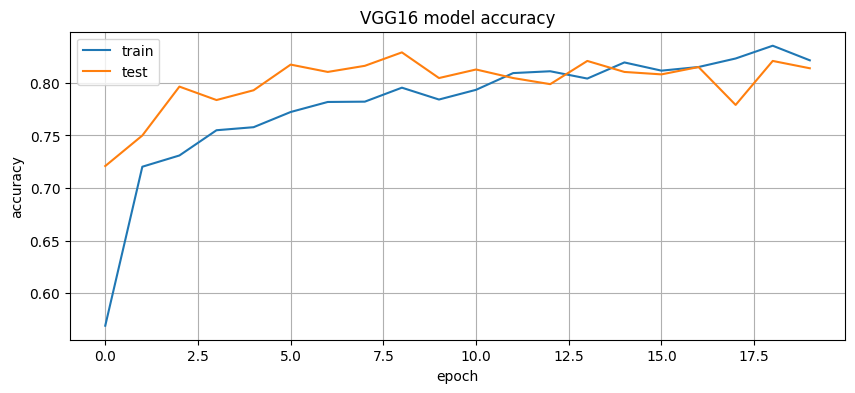

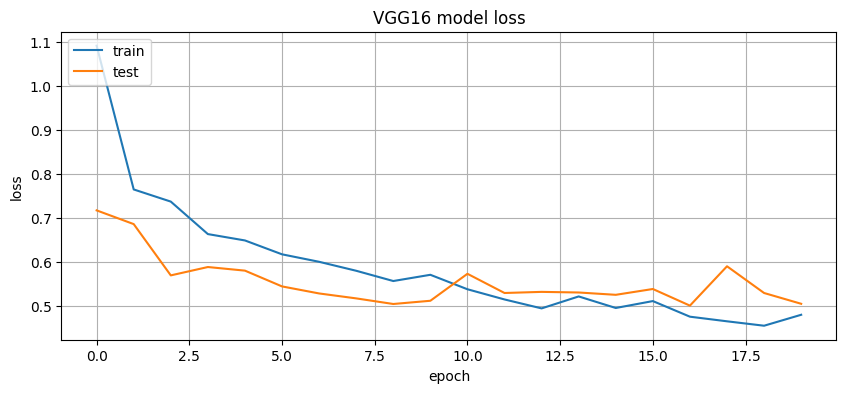

In [ ]:
# Membuat plot akurasi model VGG16
plt.figure(figsize=(10,4))
plt.plot(vgg_hist.history['accuracy'])
plt.plot(vgg_hist.history['val_accuracy'])
plt.title('VGG16 model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid(True)
plt.show()

print()

# Membuat plot loss model VGG16
plt.figure(figsize=(10,4))
plt.plot(vgg_hist.history['loss'])
plt.plot(vgg_hist.history['val_loss'])
plt.title('VGG16 model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid(True)
plt.show()

### Transfer Learning Menggunakan ResNet50

#### Memuat Model ResNet50

In [ ]:
from tensorflow.keras.applications import ResNet50

# Loading ResNet50 model
base_resnet_model = ResNet50(include_top=False,
                   input_shape=(IMAGE_SIZE[0],IMAGE_SIZE[1],3),
                   pooling='max',classes=5,
                   weights='imagenet')

base_resnet_model.trainable = False

train_data.preprocessing_function = tf.keras.applications.resnet50.preprocess_input


# Transfer learning ResNet50
resnet_model = tf.keras.models.Sequential([
    data_augmentation,
    base_resnet_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(5, activation="softmax")
])


94765736/94765736 [==============================] - 0s 0us/step


In [ ]:
# Compiling model
resnet_model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
  )

#### Melatih Model

In [ ]:
# Melatih model ResNet50
resnet_hist = resnet_model.fit(
    train_data,
    epochs=20,
    validation_data = valid_data
)

Epoch 1/20
109/109 [==============================] - 27s 181ms/step - loss: 1.6855 - accuracy: 0.2765 - val_loss: 1.5776 - val_accuracy: 0.2488
Epoch 2/20
109/109 [==============================] - 17s 156ms/step - loss: 1.5578 - accuracy: 0.3133 - val_loss: 1.4968 - val_accuracy: 0.3512
Epoch 3/20
109/109 [==============================] - 17s 153ms/step - loss: 1.5290 - accuracy: 0.3246 - val_loss: 1.5386 - val_accuracy: 0.3372
Epoch 4/20
109/109 [==============================] - 19s 174ms/step - loss: 1.5693 - accuracy: 0.2982 - val_loss: 1.4926 - val_accuracy: 0.3570
Epoch 5/20
109/109 [==============================] - 17s 158ms/step - loss: 1.5127 - accuracy: 0.3460 - val_loss: 1.4570 - val_accuracy: 0.3837
Epoch 6/20
109/109 [==============================] - 17s 155ms/step - loss: 1.4942 - accuracy: 0.3564 - val_loss: 1.4389 - val_accuracy: 0.3826
Epoch 7/20
109/109 [==============================] - 17s 155ms/step - loss: 1.5148 - accuracy: 0.3396 - val_loss: 1.4294 - val_ac

#### Evaluasi Model

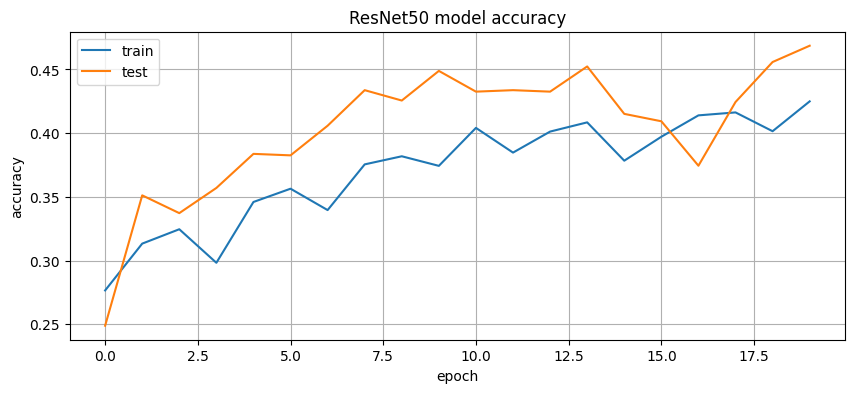

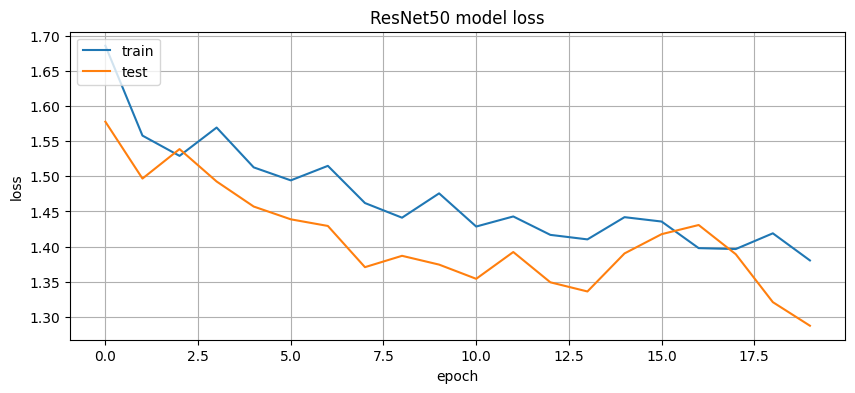

In [ ]:
# Membuat plot akurasi model ResNet50
plt.figure(figsize=(10,4))
plt.plot(resnet_hist.history['accuracy'])
plt.plot(resnet_hist.history['val_accuracy'])
plt.title('ResNet50 model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid(True)
plt.show()

print()

# Membuat plot loss model ResNet50
plt.figure(figsize=(10,4))
plt.plot(resnet_hist.history['loss'])
plt.plot(resnet_hist.history['val_loss'])
plt.title('ResNet50 model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid(True)
plt.show()

### Transfer Learning Menggunakan DenseNet201

#### Memuat Model DenseNet201

In [ ]:
# Loading DenseNet201 model
base_densenet_model = tf.keras.applications.DenseNet201(include_top=False,
                                                        weights='imagenet',
                                                        input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3),
                                                        pooling='max')
base_densenet_model.trainable=False
train_data.preprocessing_function = tf.keras.applications.densenet.preprocess_input

74836368/74836368 [==============================] - 1s 0us/step


In [ ]:
# Transfer learning DenseNet201
densenet_model = tf.keras.models.Sequential([
  data_augmentation,
  base_densenet_model,
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(5, activation='softmax')
])

# Compiling model
densenet_model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
  )

#### Melatih Model

In [ ]:
# Melatih model DenseNet201
densenet_hist = densenet_model.fit(
    train_data,
    epochs=20,
    validation_data = valid_data
)

Epoch 1/20
109/109 [==============================] - 43s 250ms/step - loss: 0.8922 - accuracy: 0.6592 - val_loss: 0.4235 - val_accuracy: 0.8465
Epoch 2/20
109/109 [==============================] - 18s 165ms/step - loss: 0.4854 - accuracy: 0.8235 - val_loss: 0.5457 - val_accuracy: 0.8070
Epoch 3/20
109/109 [==============================] - 20s 183ms/step - loss: 0.4063 - accuracy: 0.8539 - val_loss: 0.3705 - val_accuracy: 0.8802
Epoch 4/20
109/109 [==============================] - 20s 184ms/step - loss: 0.3739 - accuracy: 0.8591 - val_loss: 0.3711 - val_accuracy: 0.8686
Epoch 5/20
109/109 [==============================] - 19s 170ms/step - loss: 0.3793 - accuracy: 0.8606 - val_loss: 0.3473 - val_accuracy: 0.8802
Epoch 6/20
109/109 [==============================] - 18s 166ms/step - loss: 0.3631 - accuracy: 0.8664 - val_loss: 0.3303 - val_accuracy: 0.8872
Epoch 7/20
109/109 [==============================] - 18s 167ms/step - loss: 0.3302 - accuracy: 0.8826 - val_loss: 0.3774 - val_ac

#### Evaluasi Model

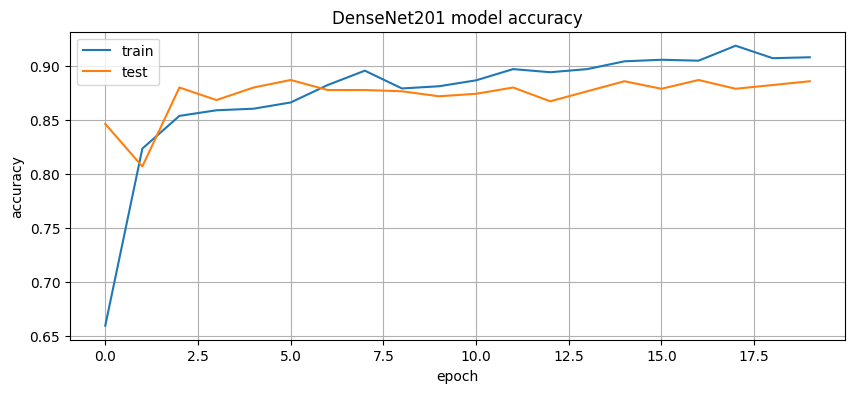

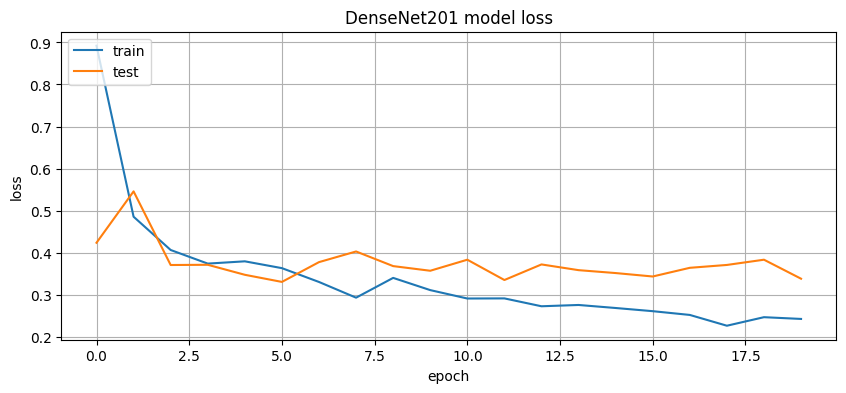

In [ ]:
# Membuat plot akurasi model DenseNet201
plt.figure(figsize=(10,4))
plt.plot(densenet_hist.history['accuracy'])
plt.plot(densenet_hist.history['val_accuracy'])
plt.title('DenseNet201 model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid(True)
plt.show()

print()

# Membuat plot loss model DenseNet201
plt.figure(figsize=(10,4))
plt.plot(densenet_hist.history['loss'])
plt.plot(densenet_hist.history['val_loss'])
plt.title('DenseNet201 model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid(True)
plt.show()

## Evaluation
Setelah membuat beberapa model, maka dapat kita bandingkan akurasi dari model-model tersebut dengan visualisasi berikut ini.


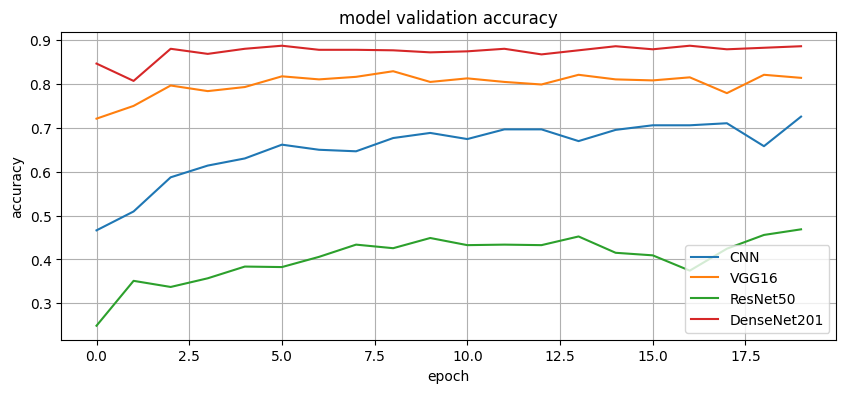

In [ ]:
# Membuat plot akurasi empat model sebelumnya untuk dibandingkan
plt.figure(figsize=(10,4))
plt.plot(cnn_hist.history['val_accuracy'])
plt.plot(vgg_hist.history['val_accuracy'])
plt.plot(resnet_hist.history['val_accuracy'])
plt.plot(densenet_hist.history['val_accuracy'])
plt.title('model validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['CNN', 'VGG16', 'ResNet50', 'DenseNet201'], loc='lower right')
plt.grid(True)
plt.show()

Dari hasil tersebut dapat diketahui bahwa model dengan DenseNet201 memiliki kinerja yang lebih baik. Untuk itu model tersebut yang akan dipilih untuk digunakan.

## Uji Coba Model

Setelah mendapatkan model dengan kinerja yang baik, maka dapat diujicobakan untuk mengenali gambar bunga.

In [ ]:
# Menampilkan daftar kelas atau label gambar
train_data.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

1/1 [==============================] - 0s 140ms/step
27465811_9477c9d044.jpg
sunflower


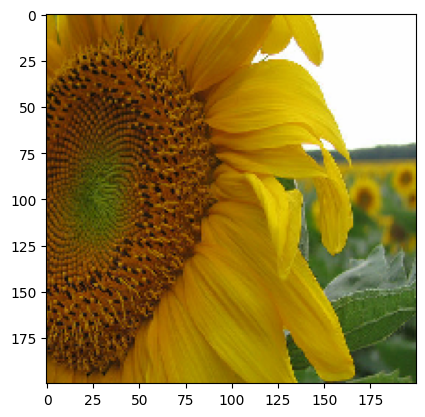

In [ ]:
# Menguji coba model
import numpy as np
from keras.preprocessing import image
%matplotlib inline

from google.colab import files

IMAGE_SIZE = (200, 200)

for fn in uploaded.keys():

  # predicting images
  path = fn
  img = image.load_img(path, target_size=IMAGE_SIZE)
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = densenet_model.predict(images, batch_size=BATCH_SIZE)
  classes = np.argmax(classes)

  print(fn)
  if classes==0:
    print('daisy')
  elif classes==1:
    print('dandelion')
  elif classes==2:
    print('rose')
  elif classes==3:
    print('sunflower')
  else:
    print('tulip')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Button(description='Upload Gambar', style=ButtonStyle())

Saving 2678588376_6ca64a4a54_n.jpg to 2678588376_6ca64a4a54_n.jpg
1/1 [==============================] - 0s 35ms/step
Kelas prediksi: sunflower


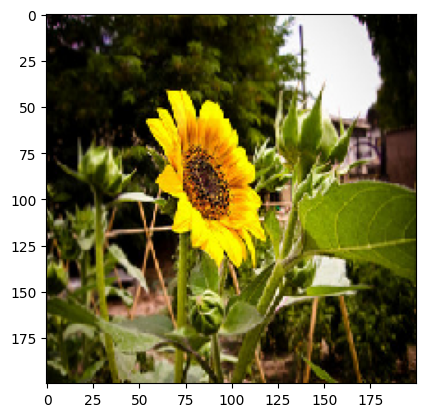

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import numpy as np
from keras.preprocessing import image
%matplotlib inline
from google.colab import files
from ipywidgets import widgets
from IPython.display import display

# Tentukan ukuran gambar target
IMAGE_SIZE = (200, 200)  # Ganti sesuai dengan ukuran yang sesuai dengan model Anda


# Fungsi untuk memprediksi gambar
def predict_image(model, image_path):
    img = image.load_img(image_path, target_size=IMAGE_SIZE)
    imgplot = plt.imshow(img)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = model.predict(images, batch_size=BATCH_SIZE)
    predicted_class = np.argmax(classes)

    return predicted_class

# Fungsi untuk mengunggah gambar
def on_upload_button_clicked(b):
    uploaded = files.upload()
    if uploaded:
        image_path = list(uploaded.keys())[0]
        predicted_class = predict_image(densenet_model, image_path)
        class_labels = ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']
        print(f'Kelas prediksi: {class_labels[predicted_class]}')


upload_button = widgets.Button(description="Upload Gambar")
upload_button.on_click(on_upload_button_clicked)

display(upload_button)

## Deployment
Agar nantinya dapat diimplementasikan atau dikembangkan lebih lanjut, model perlu di-deploy terlebih dahulu dalam format HDF5, TFLite (Mobile) atau TensorflowJS (Web)

### HDF5

In [ ]:
densenet_model.save('model-flowers-recognition.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### TFLite

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(densenet_model)
tflite_model = converter.convert()
with tf.io.gfile.GFile('model-flowers-recognition.tflite', 'wb') as f:
  f.write(tflite_model)

### TensorflowJS

In [ ]:
# Instal TensorflowJS
!pip install tensorflowjs

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.2/89.2 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 42.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 489.8/489.8 MB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 70.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 101.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 45.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 99.2 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.15.0
    Uninstalling wrapt-1.15.0:
      Successfully uninstalled wrapt-1.15.0
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.13.0
    Uninstalling tensorflow-estimator-2.13.0:
      Successfully uninstalled tensorflow-estimator-

In [ ]:
!tensorflowjs_converter \
    --input_format=keras \
    /content/model-flowers-recognition.h5 /content/modeltfjs

2023-10-13 23:08:25.968527: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-13 23:08:25.968597: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-13 23:08:25.968653: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-10-13 23:08:28.553122: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


## Penutup
Saat ini model machine learning untuk mengenali gambar bunga telah didapatkan. Dengan model ini dapat diimplementasikan lebih lanjut menjadi aplikasi web atau mobile untuk mengenali jenis bunga. Namun tentu saja model ini juga masih dapat disempurnakan dengan mencoba pretrained model yang lain, melakukan fine-tuning, atau dengan mengubah dataset yang lebih beragam dan berkualitas.